Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import csv and show head
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# look for nulls and check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
# no nulls
# change version datatype to category for quick processing
df['version'] = df.version.astype('category')

Data dictionary
    userid (int) - unique id for each user
    version (category) - version of the game they played (either gate at level 30 or gate at level 40)
    sum_gamerounds (int) - rounds played
    retention_1 (bool) - did the player come back and play 1 day after installing?
    retention_7 (bool) - did the player come back and play 7 days after installing?

In [5]:
# is your understanding correct, do some sanity checks

# user_id --> unique or not?
print("Is userid unique:",df.userid.nunique() == df.shape[0])

# version --> only two? is naming consistent?
print("Versions:", tuple(df.version.unique()))

# sum_gamerounds --> are there any weird values
display(df.sum_gamerounds.describe())

Is userid unique: True
Versions: ('gate_30', 'gate_40')


count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [6]:
# retention_1, retention_7 --> let's assign retention levelss for each case
RETENTION_LEVELS = ['No retention', 'Some retention', 'High retention']
def assign_retention_levels(df):
    if (df.retention_1 == True) and (df.retention_7 == True):
        return RETENTION_LEVELS[2]
    elif (df.retention_1 == False) and (df.retention_7 == False):
        return RETENTION_LEVELS[0]
    else:
        return RETENTION_LEVELS[1]

df['retention_level'] = df.apply(assign_retention_levels, axis=1)

df['retention_level'] = pd.Categorical(df['retention_level'], categories = RETENTION_LEVELS, ordered=True)

df['retention_level']

0          No retention
1        Some retention
2        Some retention
3          No retention
4        High retention
              ...      
90184    Some retention
90185      No retention
90186    Some retention
90187    Some retention
90188      No retention
Name: retention_level, Length: 90189, dtype: category
Categories (3, object): ['No retention' < 'Some retention' < 'High retention']

Text(0.5, 1.0, 'Retention levels for each version of the game')

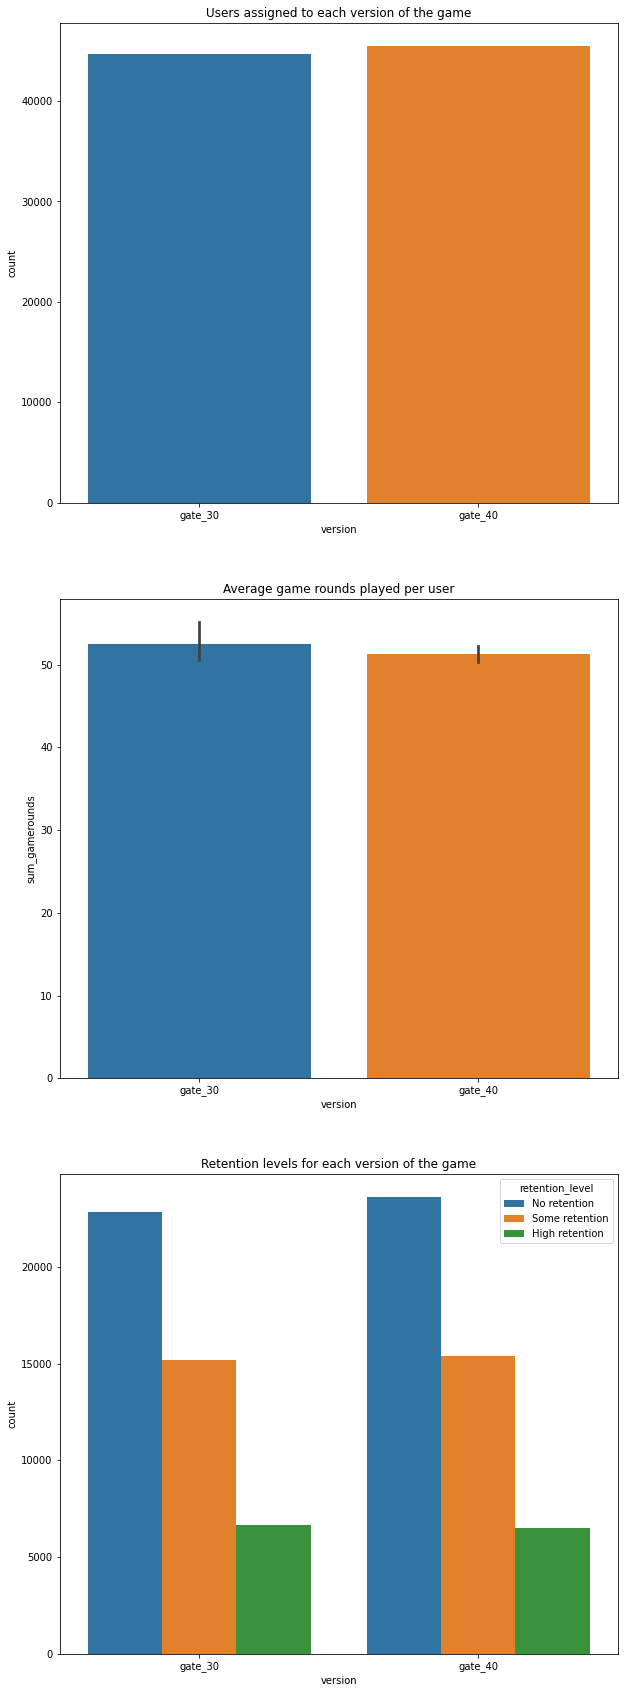

In [13]:
# Graphical EDA
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,30))

# amt of people in each group
sns.countplot(data=df, x='version', ax=ax1)
ax1.set_title('Users assigned to each version of the game')
# how many games does each group play on average
sns.barplot(data=df, x='version', y='sum_gamerounds', ax=ax2)
ax2.set_title('Average game rounds played per user')
# retention levels in each group
sns.countplot(data=df, x='version', hue='retention_level', ax=ax3)
ax3.set_title('Retention levels for each version of the game')

1. Users are equally assigned to each version
2. Users played more rounds on average in version gate_30 (still we have to test this)
3. The retention compositions for both versions look very similar (let's find a way to quantify this)

In [ ]:
# A/B test

# Null hyp: no diff in rounds played
# Test stat: diff in rounds played

# Observed difference

# Generate permutation samples and replicates


# define retention ratio

# Null hyp: no diff full retention ratio
# Test stat: diff in rounds played

# Observed difference

# Generate permutation samples and replicates